# Import Library & Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Data Preprocessing

In [3]:
# cek null data
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data[['price']].describe()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


In [13]:
data.drop(['id','date','zipcode'], axis=1, inplace=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


Text(0.5, 1.0, 'Correlation Matrix')

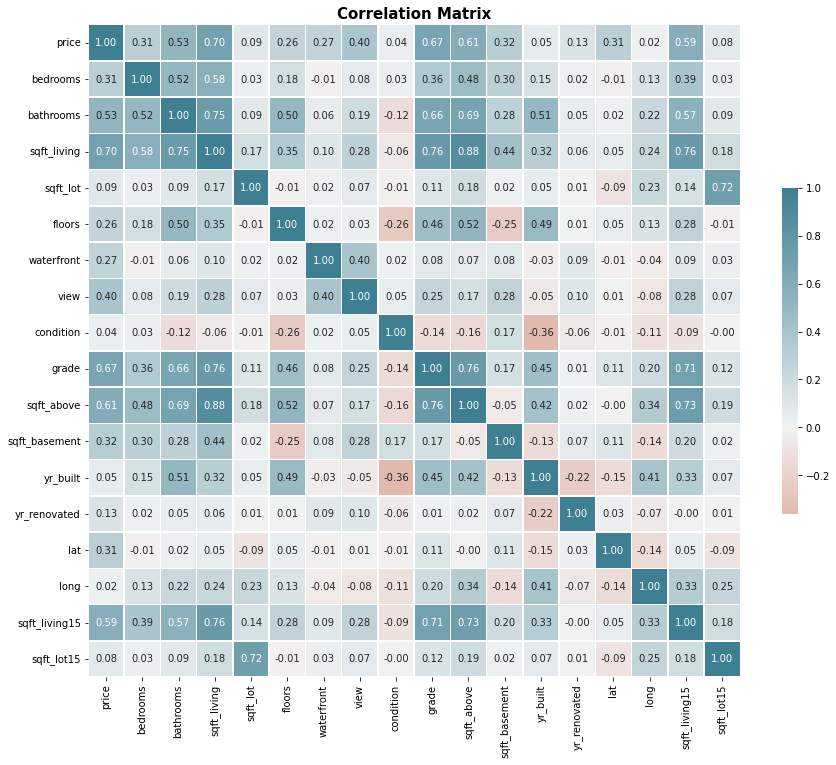

In [14]:
# correlation
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr()

plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix",size=15, weight='bold')

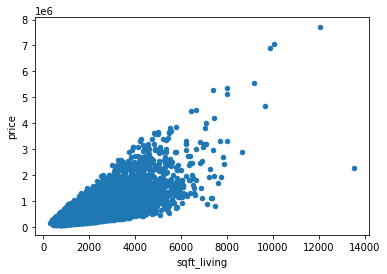

In [15]:
data.plot(kind='scatter', x='sqft_living', y='price')

# Regression Model

In [17]:
# define X & y, do train-test split

from sklearn.model_selection import train_test_split

X = data[['sqft_living']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=9)

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [18]:
# call model
linreg = LinearRegression().fit(X_train,y_train)

print(linreg.coef_)
print(linreg.intercept_)

[277.39066086]
-36663.45359033591


Y = -36663.45359033591 + 277.39066086 X

In [20]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [21]:
print("MAE Training : ", mean_absolute_error(y_train,y_train_pred))
print("MAE Testing : ", mean_absolute_error(y_test,y_test_pred))

print("MSE Training : ", mean_squared_error(y_train,y_train_pred))
print("MSE Testing : ", mean_squared_error(y_test,y_test_pred))

MAE Training :  173047.45649689602
MAE Testing :  173991.4188221097
MSE Training :  68488563918.63028
MSE Testing :  67846504186.65117


In [25]:
linreg.predict([[15000]])

array([4124196.45932574])

Y = 4124196 +- 173991

## Multiple Independent Variables

In [27]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [28]:
# define X & y, do train-test split

from sklearn.model_selection import train_test_split

X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=9)

In [29]:
# call model
linreg = LinearRegression().fit(X_train,y_train)

print(linreg.coef_)
print(linreg.intercept_)

[-3.16869039e+04  4.37264750e+04  1.03923658e+02  1.46622147e-01
  1.85589938e+03  5.84669857e+05  5.03190435e+04  3.18388832e+04
  9.61197844e+04  6.97205539e+01  3.42031034e+01 -2.51437210e+03
  2.31459792e+01  5.60634909e+05 -1.19632335e+05  3.23288786e+01
 -4.16535065e-01]
-37052163.81618417


In [30]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [31]:
print("MAE Training : ", mean_absolute_error(y_train,y_train_pred))
print("MAE Testing : ", mean_absolute_error(y_test,y_test_pred))

print("MSE Training : ", mean_squared_error(y_train,y_train_pred))
print("MSE Testing : ", mean_squared_error(y_test,y_test_pred))

MAE Training :  125774.81187131205
MAE Testing :  126120.34086060493
MSE Training :  41263471962.32885
MSE Testing :  40293169058.22102


## Lasso Regression

In [33]:
from sklearn.linear_model import Lasso

lasso_model = Lasso().fit(X_train,y_train)

y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325721554239908.2, tolerance: 230777170076.76093
  positive)


In [34]:
print("MAE Training : ", mean_absolute_error(y_train,y_train_pred))
print("MAE Testing : ", mean_absolute_error(y_test,y_test_pred))

print("MSE Training : ", mean_squared_error(y_train,y_train_pred))
print("MSE Testing : ", mean_squared_error(y_test,y_test_pred))

MAE Training :  125774.10996184562
MAE Testing :  126119.6773362628
MSE Training :  41263472241.320435
MSE Testing :  40293175200.00567


## Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

ridge_model = Ridge().fit(X_train,y_train)

y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

In [36]:
print("MAE Training : ", mean_absolute_error(y_train,y_train_pred))
print("MAE Testing : ", mean_absolute_error(y_test,y_test_pred))

print("MSE Training : ", mean_squared_error(y_train,y_train_pred))
print("MSE Testing : ", mean_squared_error(y_test,y_test_pred))

MAE Training :  125763.71051941157
MAE Testing :  126110.90099745171
MSE Training :  41263722096.48156
MSE Testing :  40294636544.11454


## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor().fit(X_train, y_train)

y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

In [38]:
print("MAE Training : ", mean_absolute_error(y_train,y_train_pred))
print("MAE Testing : ", mean_absolute_error(y_test,y_test_pred))

print("MSE Training : ", mean_squared_error(y_train,y_train_pred))
print("MSE Testing : ", mean_squared_error(y_test,y_test_pred))

MAE Training :  797.918102949682
MAE Testing :  101560.98311357854
MSE Training :  76306458.13059571
MSE Testing :  34026229255.612885


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor().fit(X_train, y_train)

y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

In [40]:
print("MAE Training : ", mean_absolute_error(y_train,y_train_pred))
print("MAE Testing : ", mean_absolute_error(y_test,y_test_pred))

print("MSE Training : ", mean_squared_error(y_train,y_train_pred))
print("MSE Testing : ", mean_squared_error(y_test,y_test_pred))

MAE Training :  26025.231459011997
MAE Testing :  69989.47947139884
MSE Training :  2476502746.0129566
MSE Testing :  15823965266.392183
